In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys 

In [3]:
data = pd.read_csv("C:\Time series\TESLA.CSV")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Pratik Choudhary\AppData\Local\Temp\ipykernel_5236\2273065366.py:1: SyntaxWarning: invalid escape sequence '\T'
  data = pd.read_csv("C:\Time series\TESLA.CSV")


In [4]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [6]:
#univariate analysis
stock_data = data[['Date','Close']]

In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [11]:
stock_data['Date'] = pd.to_datetime(stock_data.Date)

C:\Users\Pratik Choudhary\AppData\Local\Temp\ipykernel_5236\2228350605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data.Date)


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [14]:
stock_data = stock_data.set_index('Date')

In [16]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [17]:
#EDA

stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


In [18]:
stock_data.isnull().sum()

Close    0
dtype: int64

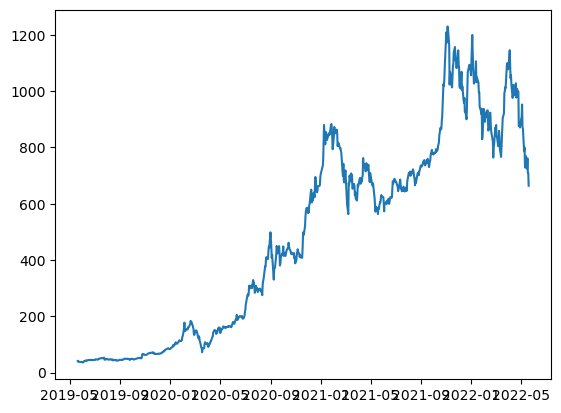

In [19]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

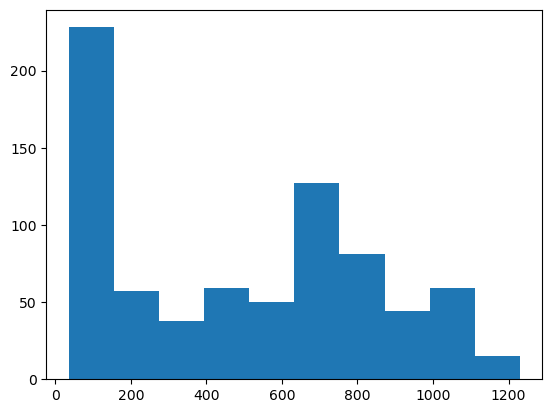

In [20]:
plt.hist(stock_data.Close)

In [21]:
import seaborn as sns

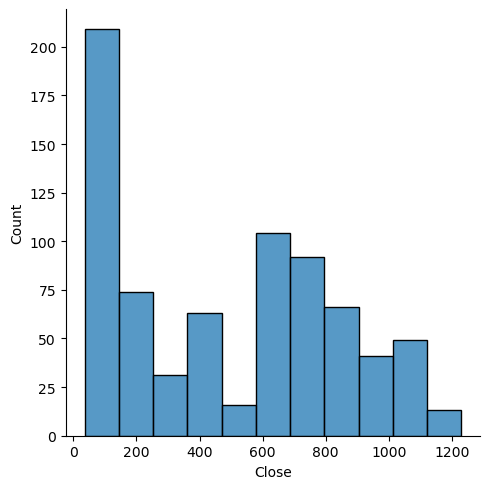

In [22]:
sns.displot(stock_data.Close)

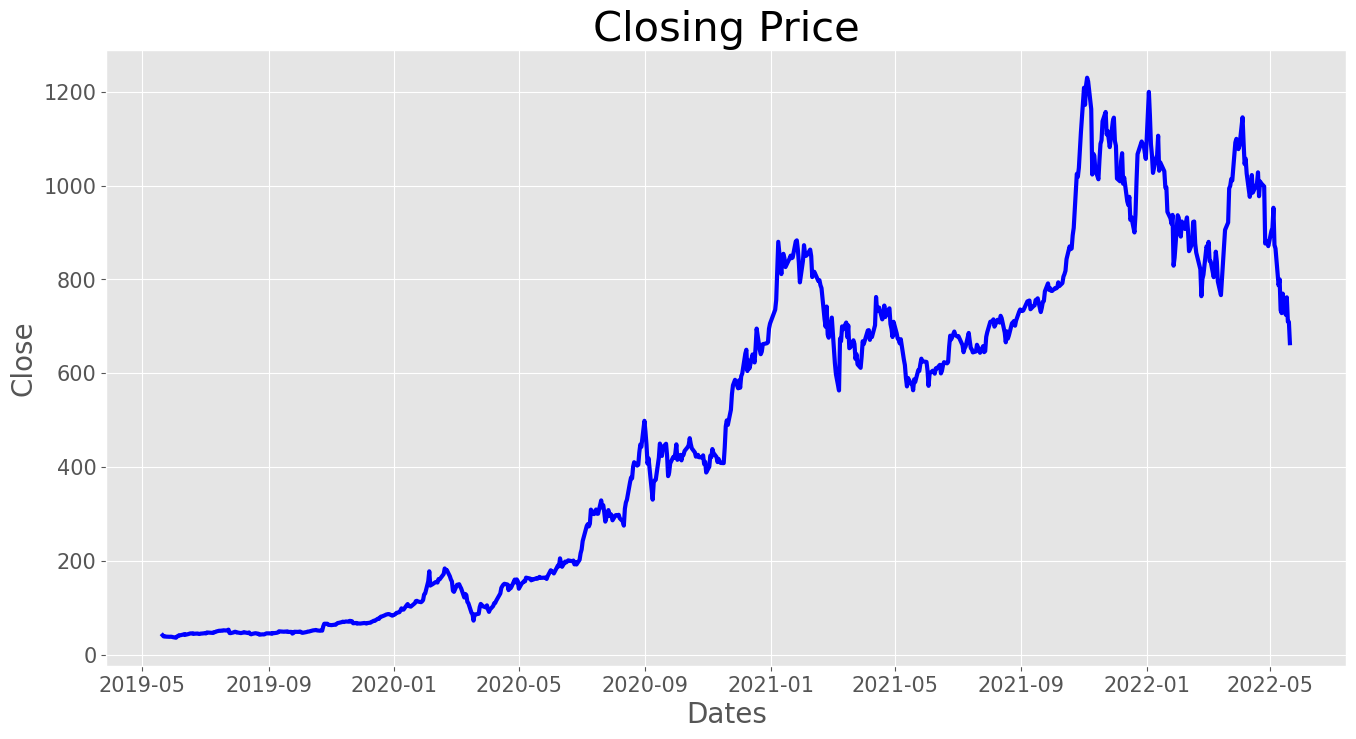

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel("Dates", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Close", fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'],linewidth=3,color='blue')
plt.title('Closing Price',fontsize=30)
plt.show()


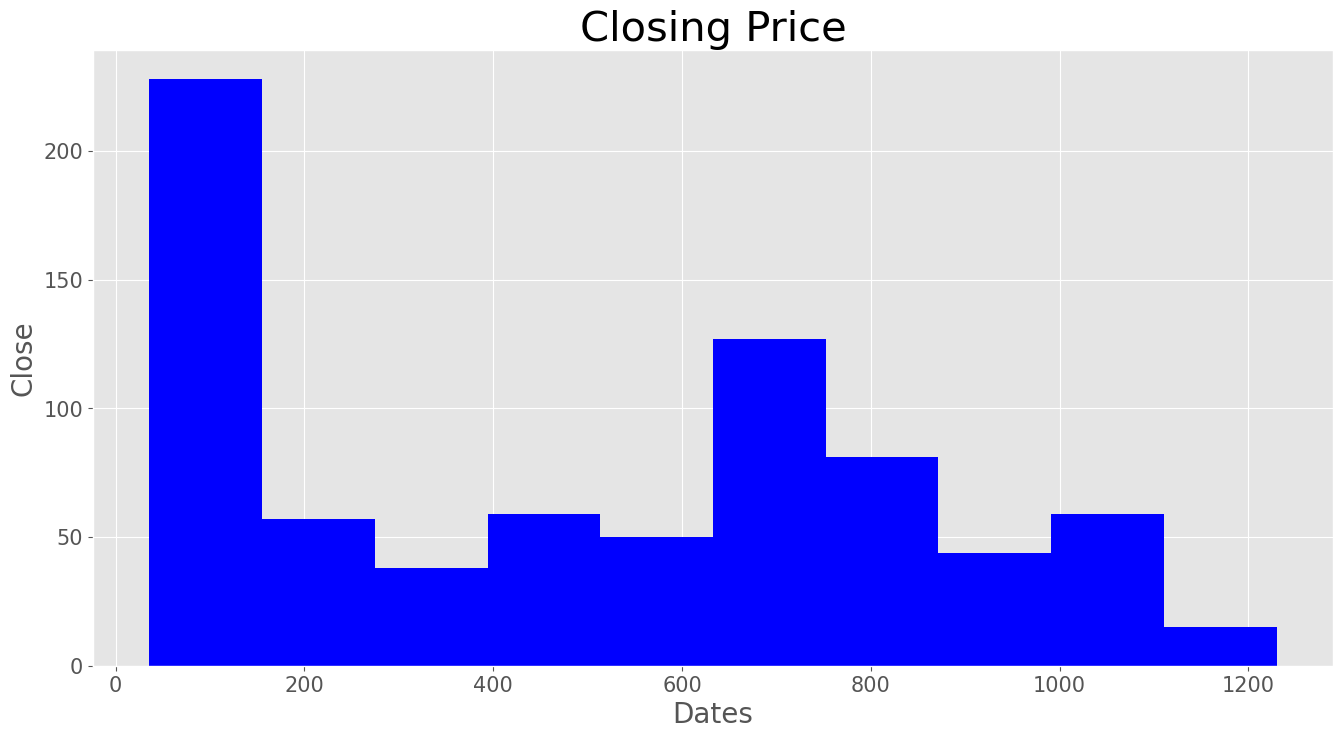

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel("Dates", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Close", fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'],linewidth=3,color='blue')
plt.title('Closing Price',fontsize=30)
plt.show()


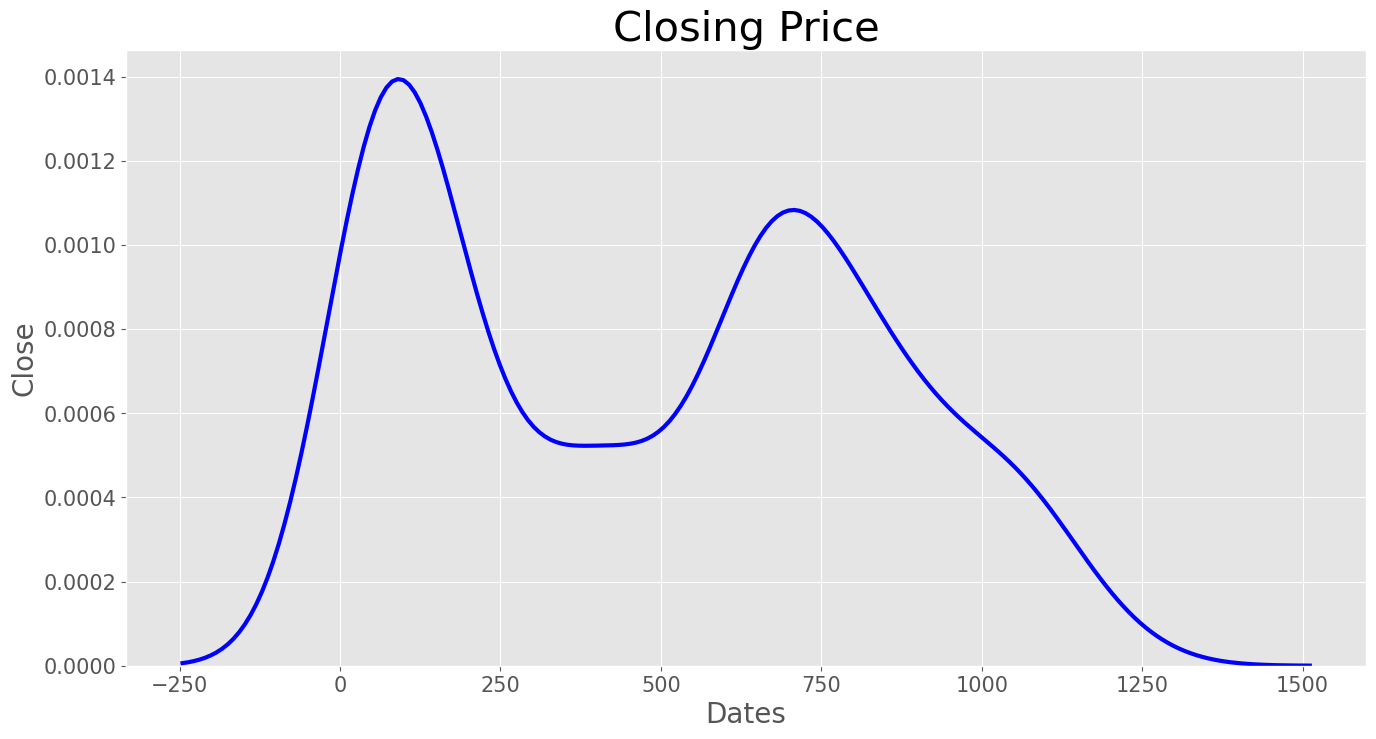

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel("Dates", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Close", fontsize=20)
plt.yticks(fontsize=15)
sns.kdeplot(stock_data['Close'],linewidth=3,color='blue')
plt.title('Closing Price',fontsize=30)
plt.show()


In [49]:
rolling_mean = stock_data['Close'].rolling(48).mean()

In [50]:
rolling_std = stock_data['Close'].rolling(48).std()

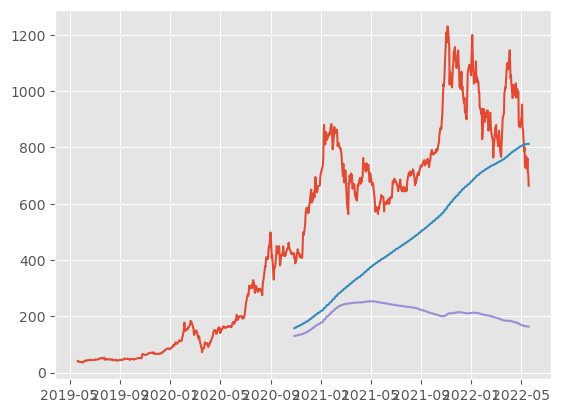

In [46]:
plt.plot(stock_data.Close)
plt.plot(rolling_mean)
plt.plot(rolling_std)

In [47]:
#ADF(ada fullar test)
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [48]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"])

test stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [51]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolling_mean = timeseries.rolling(48).mean() # rolling mean
    rolling_std = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolling_mean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolling_std, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


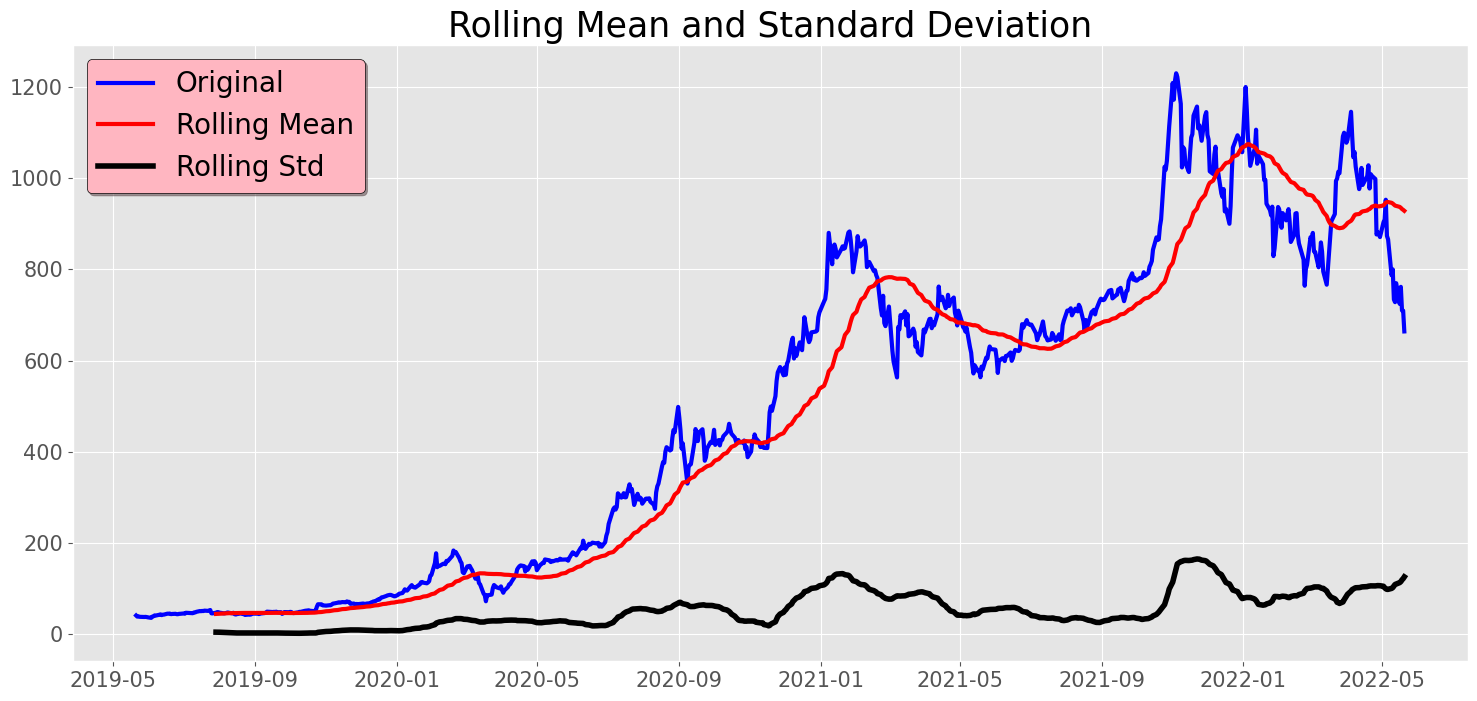

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [52]:
test_stationarity(stock_data.Close)

<Axes: >

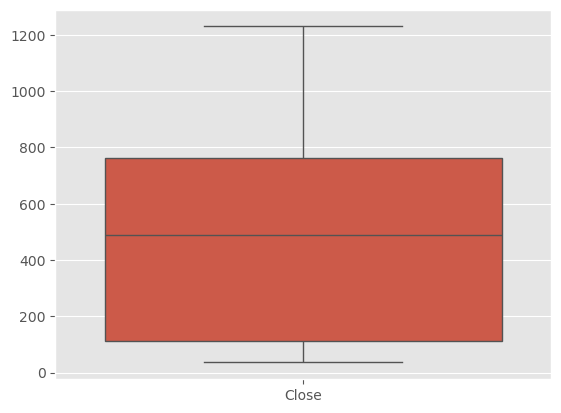

In [53]:
sns.boxplot(stock_data)

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

<Figure size 2000x1000 with 0 Axes>

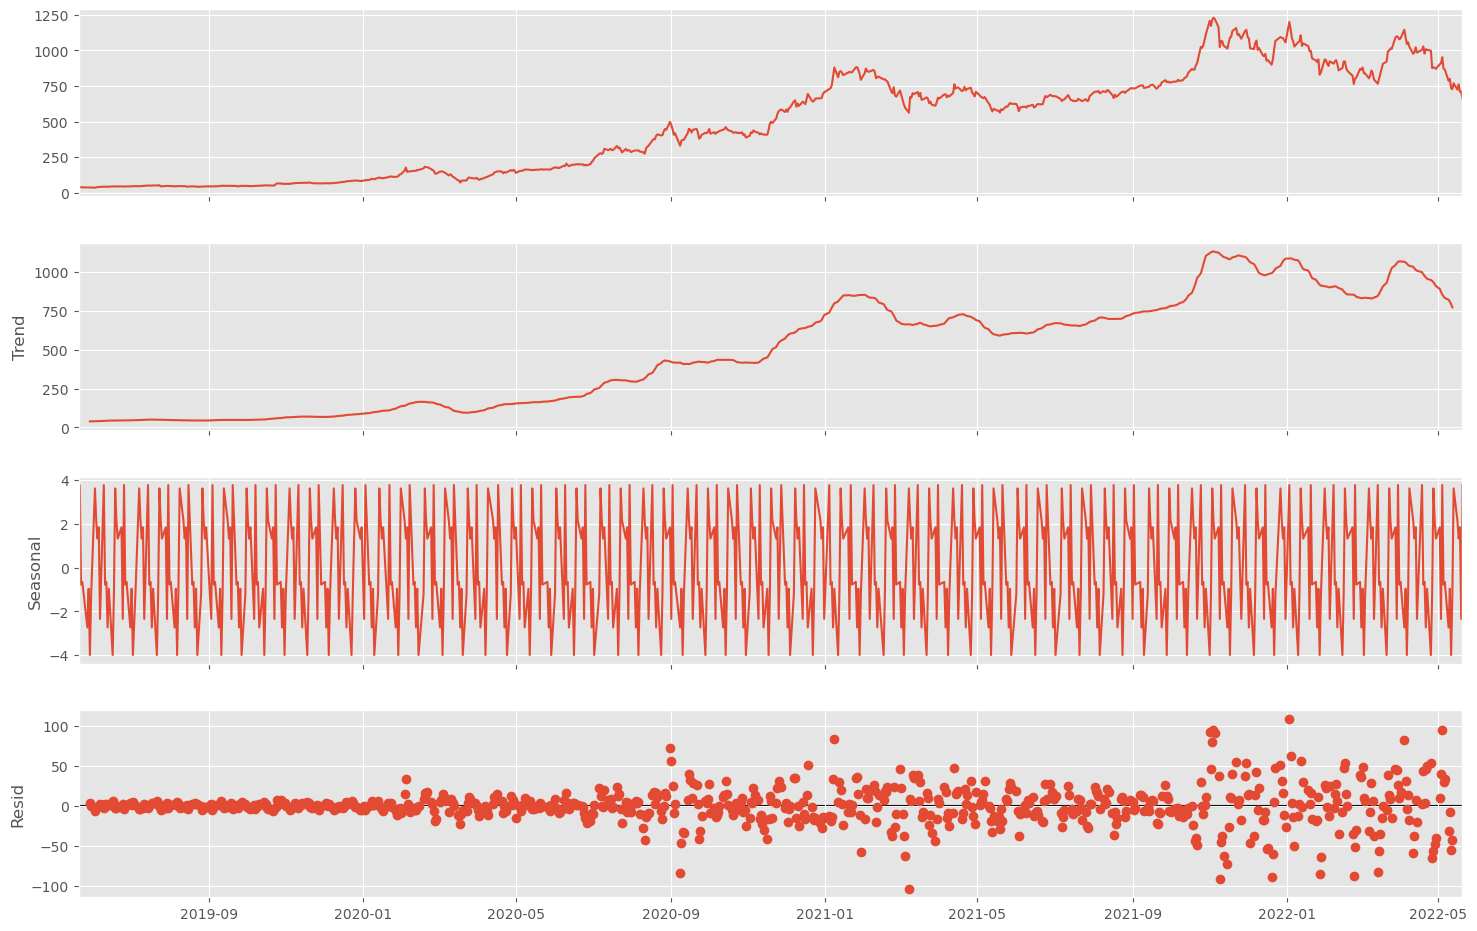

In [55]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

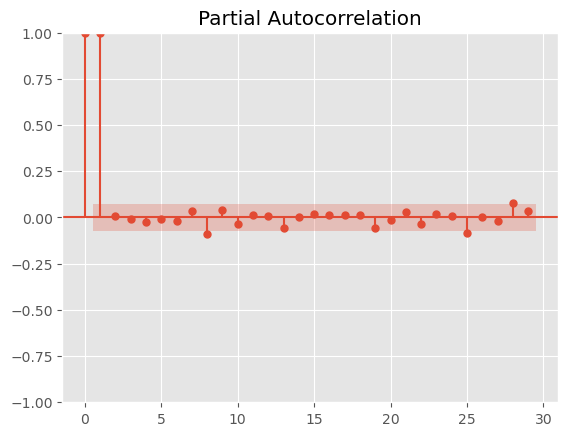

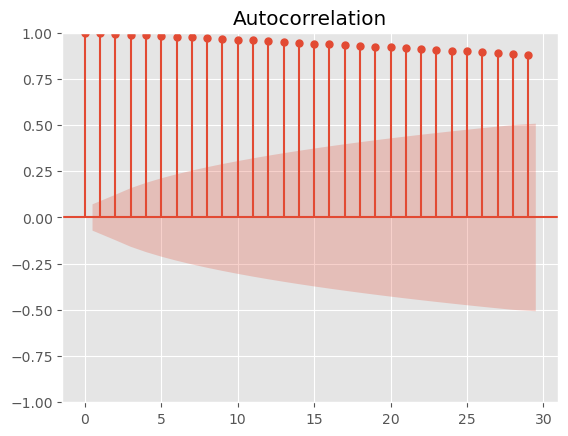

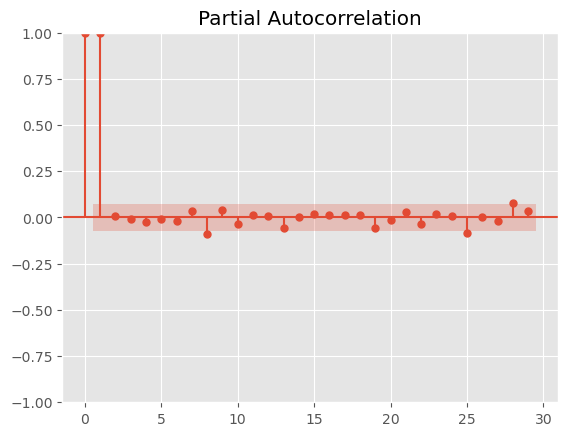

In [57]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

In [75]:
df_close = stock_data['Close']

In [79]:
df_close = df_close.diff()
df_close = df_close.dropna()

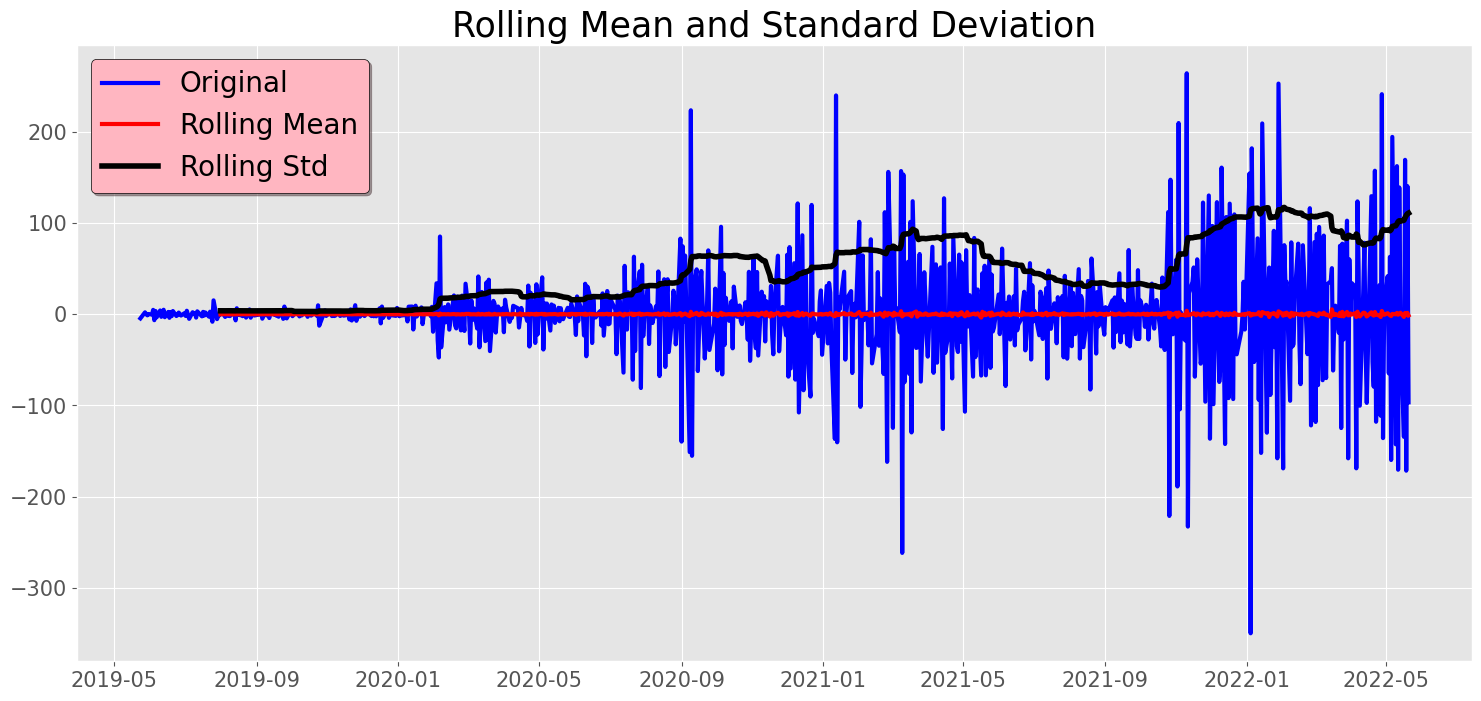

Results of dickey fuller test
Test Statistics               -1.311785e+01
p-value                        1.585467e-24
No. of lags used               2.000000e+01
Number of observations used    7.340000e+02
critical value (1%)           -3.439290e+00
critical value (5%)           -2.865486e+00
critical value (10%)          -2.568871e+00
dtype: float64


In [80]:
test_stationarity(df_close)

In [81]:
df_close[0:-60]

Date
2019-05-24     -4.545994
2019-05-28      2.110001
2019-05-29      0.031994
2019-05-30     -1.177994
2019-05-31      0.275997
                 ...    
2022-02-17     -2.290100
2022-02-18     75.670105
2022-02-22    -43.750000
2022-02-23     -5.960144
2022-02-24    116.260193
Name: Close, Length: 695, dtype: float64

In [82]:
df_close[-60:]

Date
2022-02-25   -121.850159
2022-02-28     79.090088
2022-03-01   -118.080017
2022-03-02     88.200012
2022-03-03    -77.700073
2022-03-04     95.720093
2022-03-07    -72.309998
2022-03-08     86.239929
2022-03-09    -38.780029
2022-03-10    -69.989868
2022-03-11     32.959900
2022-03-14     36.250061
2022-03-15     50.529968
2022-03-16    -61.680054
2022-03-17     -9.789917
2022-03-18      9.390015
2022-03-21    -20.440125
2022-03-22     75.070129
2022-03-23   -124.740051
2022-03-24     77.369995
2022-03-25    -27.769958
2022-03-28    102.569885
2022-03-29   -157.949890
2022-03-30     60.160034
2022-03-31      2.499878
2022-04-01     34.190063
2022-04-04     30.489990
2022-04-05   -168.919922
2022-04-06    123.739868
2022-04-07     48.310059
2022-04-08   -100.270020
2022-04-11     25.480042
2022-04-12     78.369995
2022-04-13    -36.180054
2022-04-14    -97.189941
2022-04-18    129.449951
2022-04-19    -52.089905
2022-04-20    -79.380127
2022-04-21    157.340088
2022-04-22   -117.84

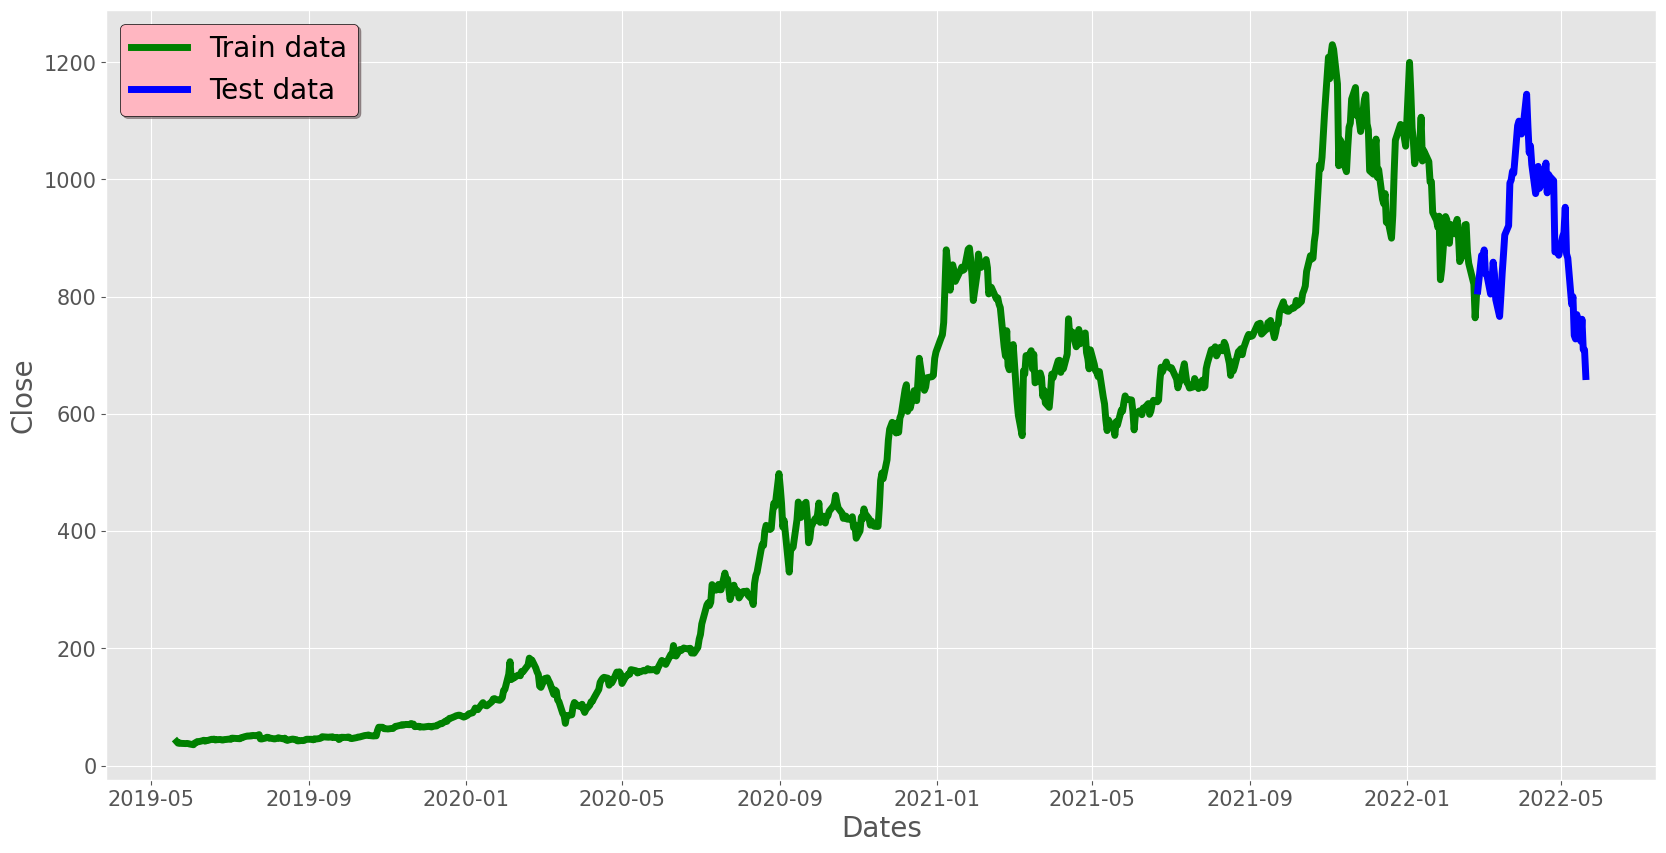

In [87]:
train_data = stock_data['Close'][0:-60]
test_data = stock_data['Close'][-60:]

plt.figure(figsize=(20, 10))
plt.grid(True)
plt.xlabel("Dates", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Close", fontsize=20)
plt.yticks(fontsize=15)

# Plotting train and test data
plt.plot(train_data, 'green', label='Train data', linewidth=5)
plt.plot(test_data, 'blue', label='Test data', linewidth=5)

# Adding legend
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
plt.show()


# Model Building

In [83]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [88]:
history=[x for x in train_data]

In [89]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [90]:
model=ARIMA(history,order=(1,1,1))

In [91]:
model=model.fit()

In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Fri, 29 Nov 2024   AIC                           6306.700
Time:                        21:09:17   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
model.forecast()[0]

800.2043838663046

In [94]:
test_data[0]

C:\Users\Pratik Choudhary\AppData\Local\Temp\ipykernel_5236\2395562395.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_data[0]


809.8699951171875

In [95]:
mean_squared_error([test_data[0]],model.forecast())

C:\Users\Pratik Choudhary\AppData\Local\Temp\ipykernel_5236\3878667994.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_squared_error([test_data[0]],model.forecast())


93.42404085319363

In [96]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

C:\Users\Pratik Choudhary\AppData\Local\Temp\ipykernel_5236\2013795996.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.sqrt(mean_squared_error([test_data[0]],model.forecast()))


9.665611250882876

In [97]:
def train_arima_model(X, y, arima_order):
   
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
  
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [99]:
def evaluate_model(dataset,test,p_values,d_values,q_values):
    dataset = dataset.astype('float')
    best_score ,best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(train_data, test_data, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [100]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_model(train_data,test_data,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.164
ARIMA(0, 0, 2) RMSE=161.586
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.580
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.581
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.637
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.738
ARIMA(2, 2, 2) RMSE=39.732
Best ARIMA(2, 0, 0) RMSE=39.440


In [101]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 39.439957307477314


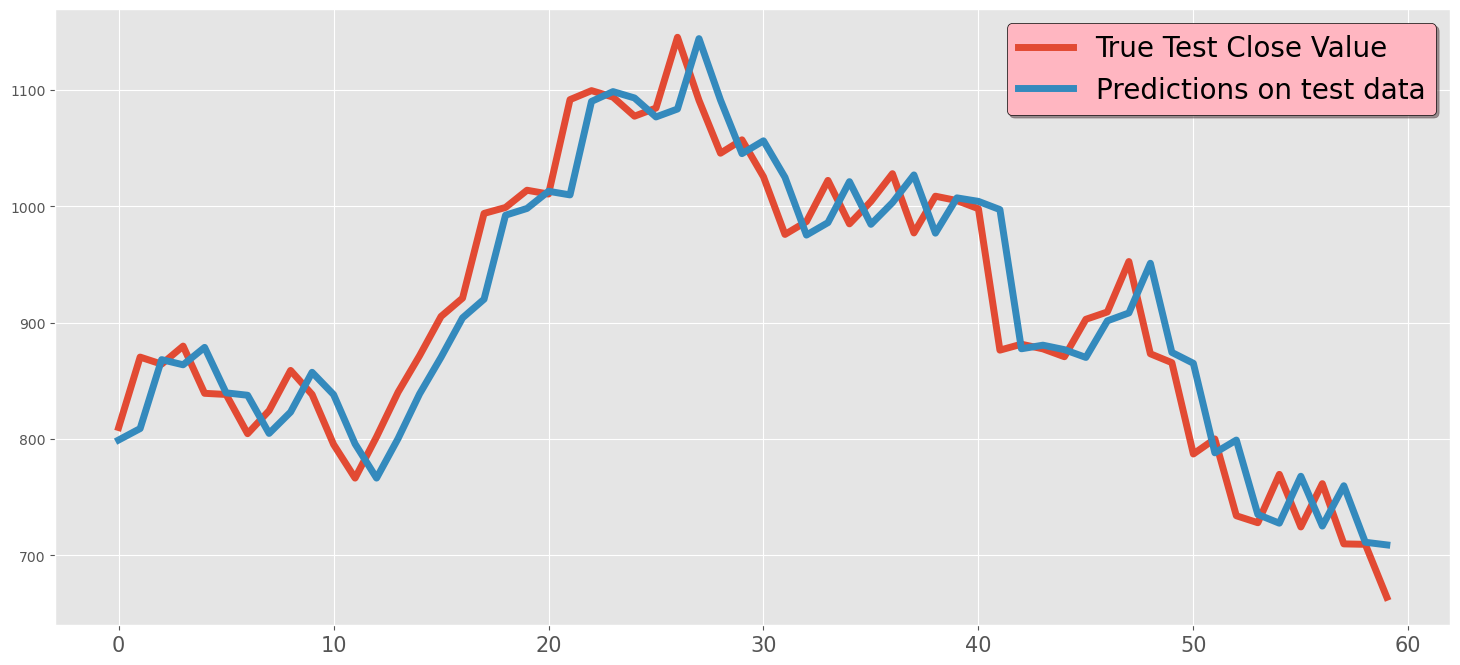

In [102]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [103]:
fc_series = pd.Series(predictions, index=test_data.index)

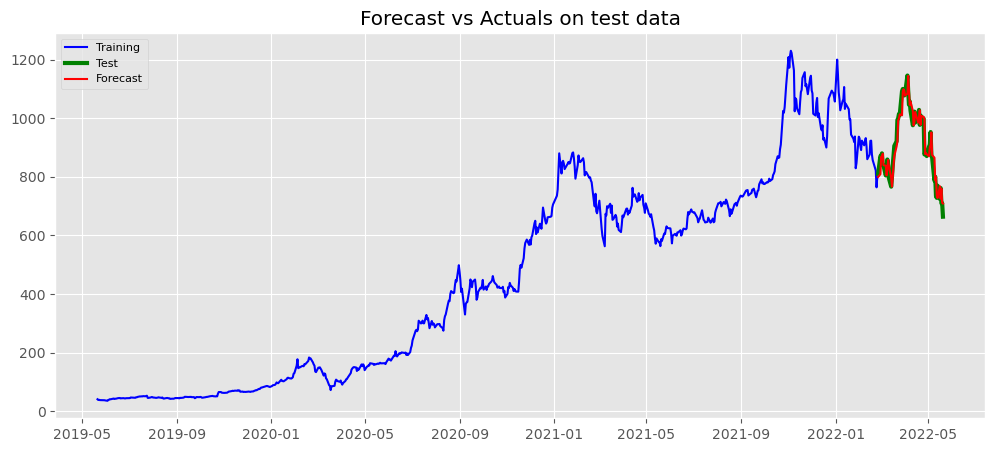

In [104]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

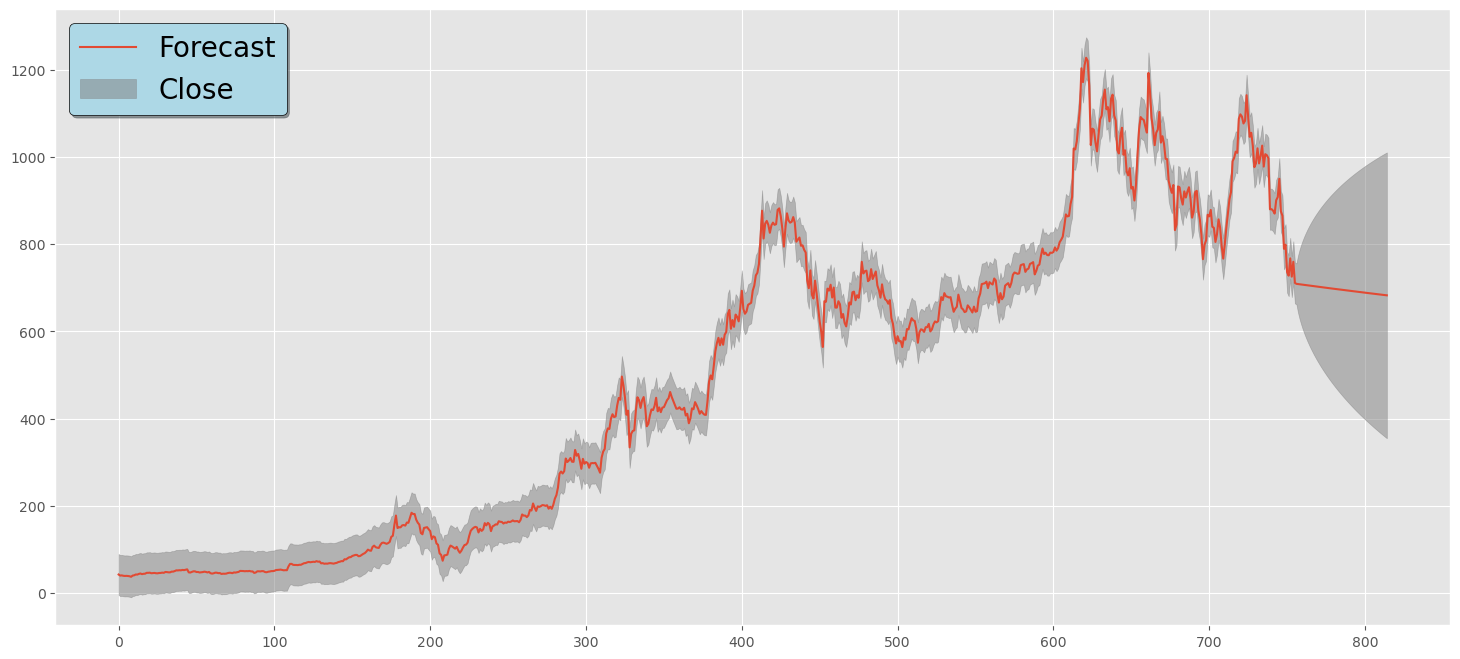

In [105]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [106]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 39.7394819514271


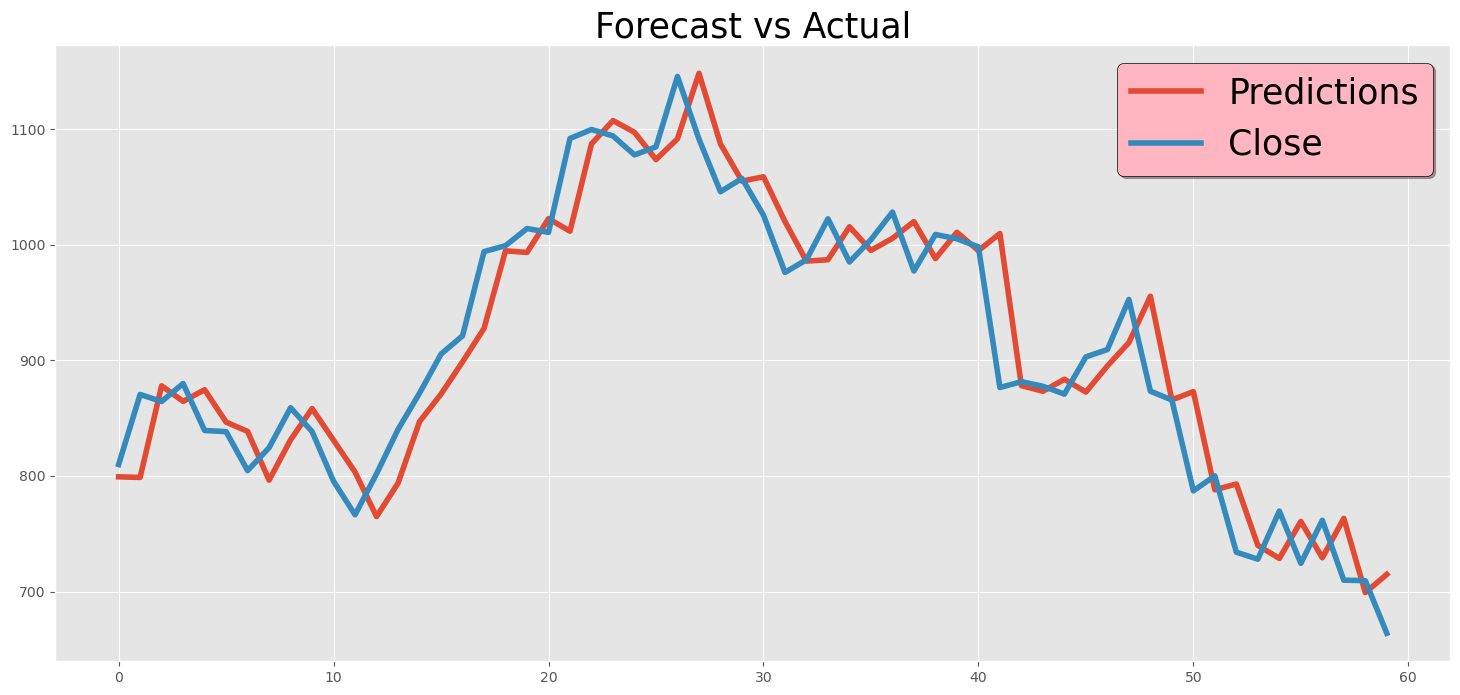

In [107]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')